<a href="https://colab.research.google.com/github/ShathaAlshalawi/Gallstone_project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Step 2: Upload file
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset-uci.csv")
print(df.head())

KeyboardInterrupt: 

In [ ]:
# Step 3: Read the dataset
df = pd.read_csv("dataset-uci.csv")
print("Dataset shape:", df.shape)
df.head()

In [ ]:
# Step 4: Five Number Summary (for numeric columns)
summary = df.describe().T[["min", "25%", "50%", "75%", "max"]]
print("Five Number Summary:")
print(summary)

In [ ]:
# Step 5: Boxplots for numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.title("Boxplots for Numeric Features")
plt.show()

# Step 6: Detect outliers using IQR method
outliers = {}
for col in df.select_dtypes(include="number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].values

print("Outliers detected per column:")
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")


In [ ]:
# Step 7: Missing values count
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

# Step 8: Visualize missing values
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Step 9: Save the dataset
df.to_csv("Preprocessed_dataset.csv", index=False)


In [ ]:


# Step 3: Scatter Plot (Age vs BMI, colored by Gallstone Status)
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Body Mass Index (BMI)'],
            c=df['Gallstone Status'], cmap='coolwarm', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter Plot: Age vs BMI (colored by Gallstone Status)")
plt.colorbar(label="Gallstone Status")
plt.show()


In [ ]:
numeric_cols = ['Age', 'Body Mass Index (BMI)','Total Cholesterol (TC)', 'Glucose']

for col in numeric_cols:
    plt.figure(figsize=(7,5))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram: {col} Distribution")
    plt.show()

In [ ]:
nominal_cols = ['Gender', 'Comorbidity', 'Gallstone Status']

for col in nominal_cols:
    counts = df[col].value_counts()
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color=['teal','orange','red'])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Bar Plot: {col} Distribution")
    plt.show()

In [ ]:
df['Gallstone Status'].value_counts()

In [ ]:
class_counts = df['Gallstone Status'].value_counts()
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['green','red'])
plt.xlabel("Gallstone Status (0=No, 1=Yes)")
plt.ylabel("Count")
plt.title("Class Label Distribution: Gallstone Status")
plt.show()

print("Class label counts:\n", class_counts)

In [ ]:
#Apply normalization to numeric attributes scale different numeric ranges into the same  scale Using MinMaxScaler

normalization_columns = ['Age', 'Body Mass Index (BMI)', 'Total Cholesterol (TC)', 'Glucose']

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[normalization_columns])

df_normalized = pd.DataFrame(
    normalized_data,
    columns=[col + '_normalized' for col in normalization_columns]
)

df_normalized.describe()

In [ ]:
# Applied variable transformation using log1p to reduce skewness and make distributions more symmetric ,automatically select attributes with skewness > 0.8

numeric_columns = ['Age', 'Body Mass Index (BMI)', 'Total Cholesterol (TC)', 'Glucose']
skewness_values = df[numeric_columns].skew()

high_skew_columns = skewness_values[abs(skewness_values) > 0.8].index.tolist()

df_processed = df.copy()
for column in high_skew_columns:
    df_processed[column + '_log'] = np.log1p(df[column])

df_processed[[col for col in df_processed.columns if '_log' in col]].head()

NameError: name 'df_normalized' is not defined

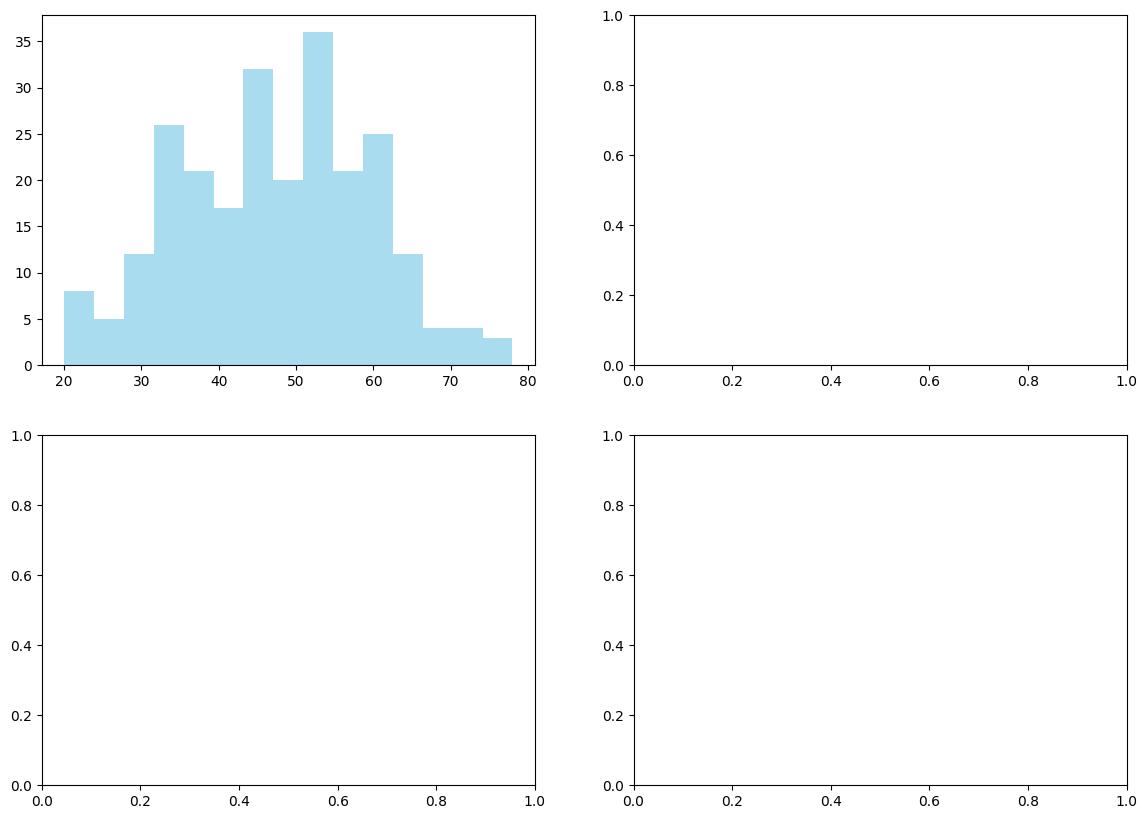

In [40]:
#Provide clear before/after visualization and justification to show  improvement after preprocessing


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Age normalization
axes[0, 0].hist(df['Age'], bins=15, alpha=0.7, color='skyblue', label='Before')
axes[0, 0].hist(df_normalized['Age_normalized'], bins=15, alpha=0.7, color='Red', label='After')
axes[0, 0].set_title('Normalization: Age Distribution')
axes[0, 0].legend()

# Plot 2: BMI normalization
axes[0, 1].hist(df['Body Mass Index (BMI)'], bins=15, alpha=0.7, color='Pink', label='Before')
axes[0, 1].hist(df_normalized['Body Mass Index (BMI)_normalized'], bins=15, alpha=0.7, color='Silver', label='After')
axes[0, 1].set_title('Normalization: BMI Distribution')
axes[0, 1].legend()

# Plot 3–4: Log transform comparison
if high_skew_columns:
    example_column = high_skew_columns[0]
    axes[1, 0].hist(df[example_column], bins=15, alpha=0.7, color='Purple', label='Before')
    axes[1, 0].set_title(f'Before Transformation: {example_column}')
    axes[1, 0].legend()

    axes[1, 1].hist(df_processed[example_column + '_log'], bins=15, alpha=0.7, color='Beige', label='After')
    axes[1, 1].set_title(f'After Log Transformation: {example_column}')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [38]:
#Feature Selection
import numpy as np
import pandas as pd
df = pd.read_csv("dataset-uci.csv", sep=";", engine="python")
print(df.shape)

report = {
    "original_shape": df.shape,
    "drop_missing_gt40": [],
    "drop_low_variance": [],
    "drop_high_corr": []
}

print("Start:", df.shape)

# (A) drop columns with >40% missing
missing_ratio = df.isna().mean()
to_drop_missing = list(missing_ratio[missing_ratio > 0.40].index)
df.drop(columns=to_drop_missing, inplace=True, errors="ignore")
report["drop_missing_gt40"] = to_drop_missing
print("After missing>40%:", df.shape, "| dropped:", to_drop_missing)

# (B) drop very low variance (only one unique value)
low_var_cols = [c for c in df.columns if df[c].nunique(dropna=True) <= 1]
df.drop(columns=low_var_cols, inplace=True)
report["drop_low_variance"] = low_var_cols
print("After low variance:", df.shape, "| dropped:", low_var_cols)

# (C) drop highly correlated numeric features (|corr| > 0.92)
num_cols = df.select_dtypes(include=[np.number]).columns
to_drop_corr = []
if len(num_cols) > 1:
    corr = df[num_cols].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.92)]
    df.drop(columns=to_drop_corr, inplace=True)
report["drop_high_corr"] = to_drop_corr
print("After high correlation:", df.shape, "| dropped:", to_drop_corr)

print("\nFeature Selection completed")
print("New shape:", df.shape)
report

(319, 39)
Start: (319, 39)
After missing>40%: (319, 39) | dropped: []
After low variance: (319, 39) | dropped: []
After high correlation: (319, 37) | dropped: ['Lean Mass (LM) (%)', 'Muscle Mass (MM)']

Feature Selection completed
New shape: (319, 37)


{'original_shape': (319, 39),
 'drop_missing_gt40': [],
 'drop_low_variance': [],
 'drop_high_corr': ['Lean Mass (LM) (%)', 'Muscle Mass (MM)']}

In [39]:
# NOISE REMOVAL: Z-score outliers (|z|>3) on numeric columns only
num_cols = df.select_dtypes(include=[np.number]).columns
rows_removed = 0

if len(num_cols) > 0:
    means = df[num_cols].mean()
    stds  = df[num_cols].std(ddof=0).replace(0, np.nan)
    z = (df[num_cols] - means) / stds
    outliers = (z.abs() > 3).any(axis=1)
    rows_removed = int(outliers.sum())
    df = df.loc[~outliers].copy()

print("Outlier rows removed (|z|>3):", rows_removed)
print("Final shape:", df.shape)

Outlier rows removed (|z|>3): 73
Final shape: (246, 37)


In [42]:
#Save the preprocessed dataset

# Save the cleaned and processed dataset to a new CSV file
df.to_csv("Preprocessed_dataset.csv", index=False)

print("Preprocessed dataset saved successfully!")
print("File name: Preprocessed_dataset.csv")

Preprocessed dataset saved successfully!
File name: Preprocessed_dataset.csv
